In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import folium
import requests, json
from urllib.parse import quote 


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [61]:
mpg = sns.load_dataset('mpg')
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [62]:
mpg.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [63]:
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [64]:
mpg.pivot_table('mpg', 'cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


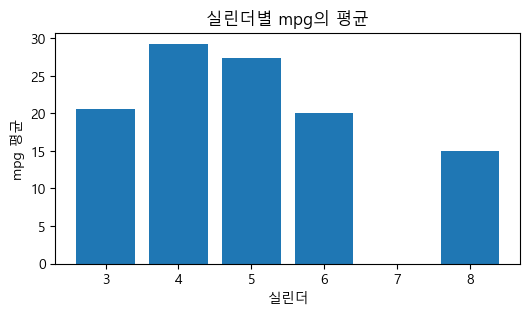

In [65]:
x = mpg.pivot_table('mpg', 'cylinders')
plt.figure(figsize=(6, 3))
plt.bar(x.index, x.mpg)
plt.title('실린더별 mpg의 평균')
plt.xlabel('실린더')
plt.ylabel('mpg 평균')
plt.show()


In [66]:
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [67]:
mpg_scatter = mpg[['displacement','horsepower']]

mpg_scatter.shape

(398, 2)

In [68]:
mpg_scatter.isna().sum()

displacement    0
horsepower      6
dtype: int64

In [69]:

mpg_scatter.horsepower.fillna(mpg_scatter.horsepower.mean(), inplace=True)

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_9792\913432034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_scatter.horsepower.fillna(mpg_scatter.horsepower.mean(), inplace=True)


In [70]:
num = mpg_scatter.count()
num

displacement    398
horsepower      398
dtype: int64

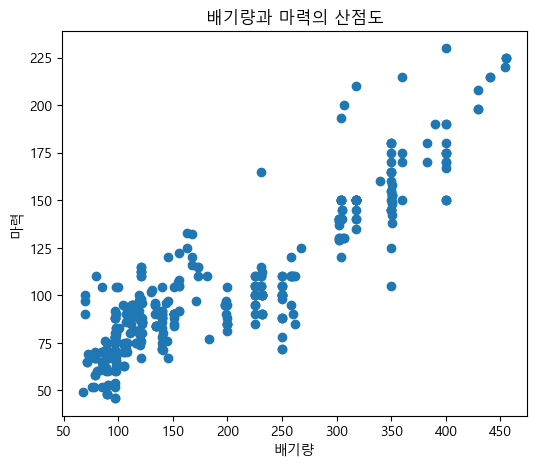

In [71]:
plt.figure(figsize=(6, 5))
plt.scatter(mpg_scatter.displacement, mpg_scatter.horsepower)
plt.title('배기량과 마력의 산점도')
plt.xlabel('배기량')
plt.ylabel('마력')
plt.show()



In [72]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [73]:
mpg['manufacturer'] = mpg.name.apply(lambda x : x.split()[0])
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [74]:
manu_model = mpg.manufacturer.value_counts().head(10)
manu_model.head()

manufacturer
ford         51
chevrolet    43
plymouth     31
amc          28
dodge        28
Name: count, dtype: int64

In [75]:
manu_mean = mpg.pivot_table('mpg', 'manufacturer').sort_values('mpg', ascending=False).head(10)
manu_mean.head()

,mpg
manufacturer,
vw,39.016667
nissan,36.000000
triumph,35.000000
honda,33.761538
renault,32.880000


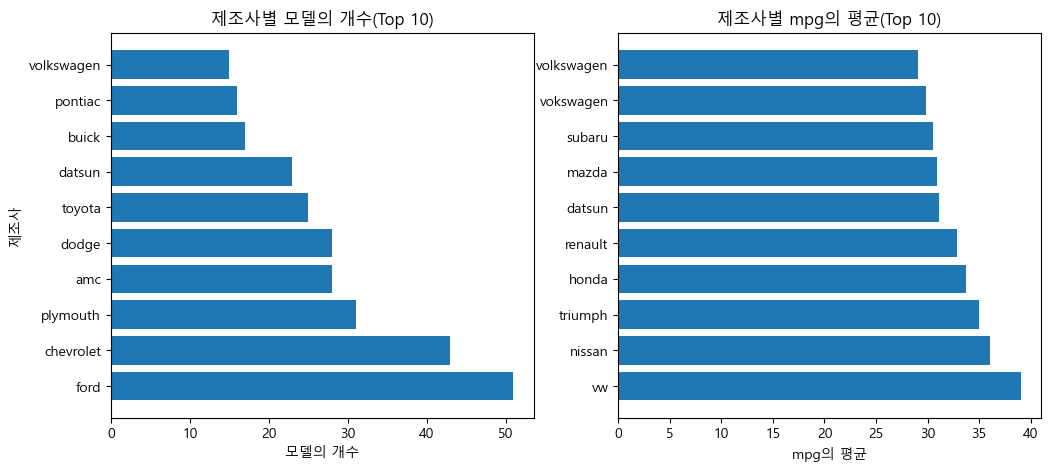

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) 

plt.title('제조사별 모델의 개수(Top 10)')
plt.barh(manu_model.index, manu_model.values)
plt.xlabel('모델의 개수')
plt.ylabel('제조사')

plt.subplot(122)
plt.title('제조사별 mpg의 평균(Top 10)')
plt.barh(manu_mean.index, manu_mean.mpg)
plt.xlabel('mpg의 평균')
plt.show()

In [77]:
df = pd.read_csv('경기도청사및출장소현황.csv', encoding='euc-kr')
df.head()

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
1,2023-03-08,안성시,고삼면,031-678-3980,17505,경기도 안성시 고삼면 고삼호수로 21,경기도 안성시 고삼면 가유리 287-11번지,37.082693,127.263456
2,2023-03-08,안성시,공도읍,031-678-3610,17560,경기도 안성시 공도4로 8,경기도 안성시 공도읍 만정리 793-1번지,37.001014,127.172515
3,2023-03-08,안성시,보개면,031-678-3680,17509,경기도 안성시 보개면 보개원삼로 220,경기도 안성시 보개면 불현리 42-1번지,37.023016,127.290858
4,2023-03-08,안성시,금광면,031-678-3710,17536,경기도 안성시 금광면 금광오산로 228,경기도 안성시 금광면 내우리 20-9번지,36.997233,127.317531


In [78]:
df = df[(df.구분명.str.contains('구청') | df.구분명.str.contains('도청') | df.구분명.str.contains('시청')) & ~(df.구분명.str.contains('별관')) & ~(df.구분명.str.contains('임시')) ]
df.head()

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
17,2023-02-15,안산시,단원구청,031-481-6000,15396,경기도 안산시 단원구 중앙대로 685 (초지동),경기도 안산시 단원구 초지동 666-2번지,37.320905,126.815245
22,2023-02-15,안산시,안산시청,031-481-2000,15335,경기도 안산시 단원구 화랑로 387 (고잔동),경기도 안산시 단원구 고잔동 515번지,37.321956,126.830878
42,2023-02-15,안산시,상록구청,031-481-5000,15585,경기도 안산시 상록구 석호로 110 (사동),경기도 안산시 상록구 사동 1585번지,37.300692,126.846368
52,2023-02-14,군포시,군포시청,031-392-3000,15829,경기도 군포시 청백리길 6,경기도 군포시 금정동 844번지,37.361254,126.936150


In [79]:
df.isna().sum()

집계일자        0
시군명         0
구분명         0
전화번호안내      1
소재지우편번호     0
소재지도로명주소    0
소재지지번주소     0
WGS84위도     0
WGS84경도     0
dtype: int64

In [80]:
df['주소'] = df.소재지도로명주소.apply(lambda x: x.split('(')[0].strip())

In [81]:
df = df[['구분명', '전화번호안내', '주소']]
df.head()

,구분명,전화번호안내,주소
0,안성시청,031-678-2114,경기도 안성시 시청길 25
17,단원구청,031-481-6000,경기도 안산시 단원구 중앙대로 685
22,안산시청,031-481-2000,경기도 안산시 단원구 화랑로 387
42,상록구청,031-481-5000,경기도 안산시 상록구 석호로 110
52,군포시청,031-392-3000,경기도 군포시 청백리길 6


In [82]:

with open('../03.DataAnalysis/04.지도시각화/data/kakaoapikey.txt') as f:
    kakao_key = f.read()

base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}


In [83]:

lat_list, lng_list = [], []

for gov in df.주소:

    url = f'{base_url}?query={quote(gov)}'

    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))     

df['위도'] = lat_list
df['경도'] = lng_list


In [84]:
df.head()


,구분명,전화번호안내,주소,위도,경도
0,안성시청,031-678-2114,경기도 안성시 시청길 25,37.008308,127.279210
17,단원구청,031-481-6000,경기도 안산시 단원구 중앙대로 685,37.319777,126.811755
22,안산시청,031-481-2000,경기도 안산시 단원구 화랑로 387,37.322557,126.832714
42,상록구청,031-481-5000,경기도 안산시 상록구 석호로 110,37.301335,126.846410
52,군포시청,031-392-3000,경기도 군포시 청백리길 6,37.361023,126.935316


In [91]:
df['청구분'] = df.구분명.apply(lambda x: (x.split('청')[0][-1]+'청'))



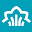
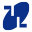
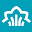
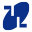
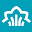
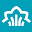
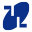
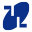
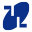
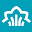
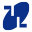
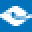
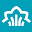
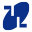
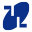
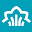
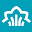
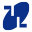
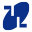
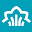
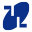
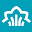
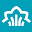
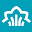
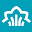
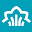
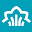
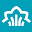
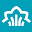
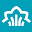
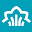
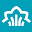
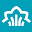
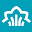
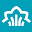
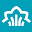
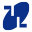
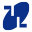
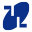
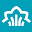
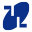
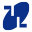
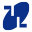
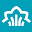
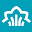
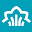

In [93]:


g_map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=9)
for i in df.index:
    pushpin_col = folium.CustomIcon(f'{df.청구분[i]}.png', icon_size=(40, 40))

    folium.Marker(
        location=[df.위도[i], df.경도[i]], 
        popup=folium.Popup(df.전화번호안내[i], max_width=200),
        tooltip=df.구분명[i],
        icon=pushpin_col
    ).add_to(g_map)

title_html = '<h3 align="center" style="font-size:20px;">경기도청사 및 출장소 현황</h3>'
g_map.get_root().html.add_child(folium.Element(title_html))
g_map